## 1P and 2P resolution estimation ##

In [22]:
#import pylab
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1P Formulas ###

In the lateral direction:
$$ \Delta x,y = \frac{\lambda}{2\cdot \text{NA}}  $$
And in the axial direction:
$$ \Delta z = \frac{2\cdot \lambda}{\text{NA}^2} $$
Third formula:
$$ \Delta z_{\text{FWHM}}=\frac{0.64 \cdot \lambda}{n-\sqrt{n^2-\text{NA}^2}}$$

In [ ]:
resolution_sp_xy = @(lambda, NA) lambda./(2.*NA);
resolution_sp_z = @(lambda, NA, n) 2.*lambda.*n./(NA.^2);
resolution_sp_z_FWHM = @(lambda, NA, n) 0.64*lambda./(n-(sqrt(n.^2-NA.^2)));

In [29]:
def resolution_sp_xy(wavelength,NA):
    return np.divide(wavelength,2*NA)

def resolution_sp_z(wavelength,NA,n):
    return np.divide(2*wavelength*n,np.power(NA,2))

def resolution_sp_z_FWHM(wavelength, NA, n):
    return np.divide(0.64*wavelength,n-np.sqrt(np.power(n,2)-np.power(NA,2)))

In [13]:
lambda1 = 0.48
NA = 1.4
print(resolution_sp_xy(lambda1,NA))
print(resolution_sp_z(lambda1,NA,n=1.33))

0.171428571429
0.651428571429


### Plot: 1P xy and z resolution with NA ###

In [72]:
NA = np.linspace(0.05,1.5,1000)
wavelength = 0.45
n = 1.33

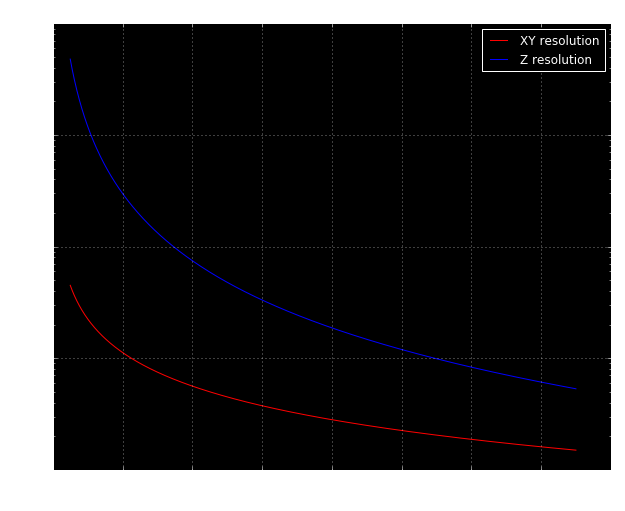

In [78]:
fig = plt.figure()

titlestring =  'Single-photon xy and z resolution at a wavelength of '+ str(wavelength) + ' µm'

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(10, 8)
ax = fig.add_subplot(111)
ax.plot(NA, resolution_sp_xy(wavelength, NA),'r', label='XY resolution')
ax.plot(NA, resolution_sp_z(wavelength, NA,n),'b', label='Z resolution')

legend = ax.legend()
ax.set_yscale('log')
ax.set_xlabel('Numerical aperture (NA)')
ax.set_ylabel('Resolution (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

## Two-photon resolution formulas ##

In the lateral direction:
$$ \Delta x_{FWHM} =
  \begin{cases}
   2\sqrt{\ln 2}\cdot\frac{0.32\lambda}{\sqrt{2}\text{NA}} & \text{if } \text{NA} < 0,7 \\
   2\sqrt{\ln 2}\cdot\frac{0.325\lambda}{\sqrt{2}\text{NA}^{0.91}} & \text{if } \text{NA} > 0,7
  \end{cases} $$
  
 And in the axial direction:
 $$ \Delta z_{FWHM} =2\sqrt{\ln 2}\cdot\frac{0.532\cdot \lambda}{\sqrt{2}}\left(\frac{1}{n-\sqrt{n^2-\text{NA}^2}}\right) $$

According to Zipfel 2003: Nonlinear magic: multiphoton microscopy in the biosciences 
[Paper Link](http://dx.doi.org/10.1038/nbt899)

In [ ]:
% Two photon (according to Zipfel 2003)
resolution_tp_xy_lowNA_FWHM = @(lambda, NA) 0.32*lambda./(sqrt(2).*NA)*2*sqrt(log(2));
resolution_tp_xy_highNA_FWHM = @(lambda, NA) 0.325*lambda./(sqrt(2).*NA.^0.91)*2*sqrt(log(2));
resolution_tp_z_FWHM = @(lambda, NA, n) 0.532*lambda/sqrt(2).*(1./(n-sqrt(n.^2-NA.^2)))*2*sqrt(log(2));

In [173]:
def resolution_tp_xy_lowNA_FWHM(wavelength, NA):
    assert np.min(NA) != 0 or np.min(NA) < 0, 'NA has to be different and larger than 0'
    assert np.min(NA) <= 0.7, 'NA has to be lower or equal than 0.7 for this formula to be used.'
    return np.divide(0.32*wavelength,np.sqrt(2)*NA)*2*np.sqrt(np.log(2))

def resolution_tp_xy_highNA_FWHM(wavelength, NA):
    assert np.min(NA) != 0 or np.min(NA) < 0, 'NA has to be different and larger than 0'
    assert np.min(NA) > 0.7, 'NA has to be larger than 0.7 for this formula to be used.'
    return np.divide(0.325*wavelength,np.sqrt(2)*np.power(NA,0.91))*2*np.sqrt(np.log(2))

def resolution_tp_z_FWHM(wavelength, NA, n):
    assert np.max(NA) <= np.min(n), 'The numerical aperture (NA) has to be smaller or equal than the refractive index n'
    return np.divide(0.532*wavelength,np.sqrt(2))*np.divide(1,n-np.sqrt(np.power(n,2)-np.power(NA,2)))

In [140]:

print(resolution_tp_xy_lowNA_FWHM(0.85,0.28))
print(resolution_tp_xy_highNA_FWHM(0.85,1.4))
print(resolution_tp_z_FWHM(0.85,1.3,1.3))

1.14376973616
0.239471316957
0.245964374194


In [174]:
wavelength1 = 0.85
wavelength2 = 1.027
n = 1.33
# defining two NA arrays so I won't have trouble with the necessary min/max values to avoid assert errors to 
# be thrown, especially ensuring that the NA stays below the refractive index n
NA = np.linspace(0.2,n-0.01,100)
NA1 = np.linspace(0.1,0.7,1000)
NA2 = np.linspace(0.7001,n-0.01,1000)

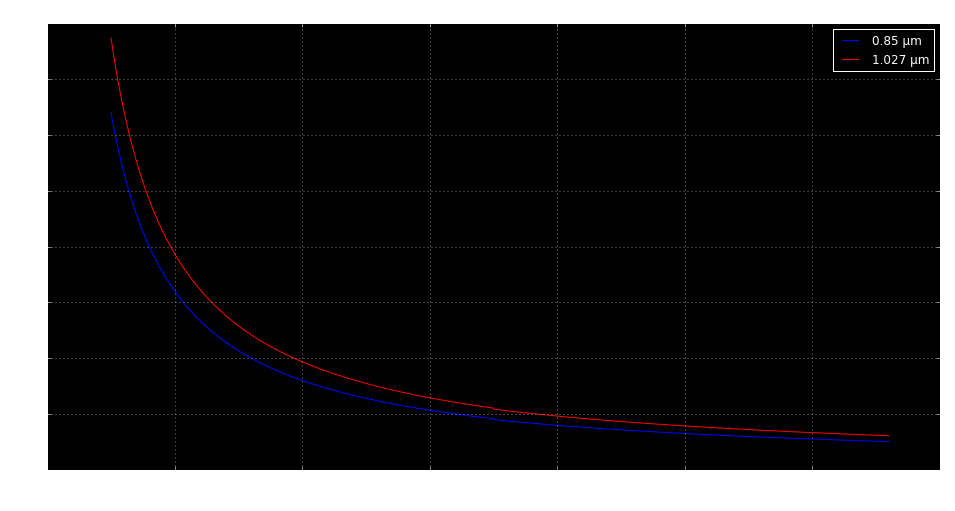

In [181]:
fig = plt.figure()
# change resolution
titlestring =  'Two-photon xy resolution'

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(16, 8)
ax = fig.add_subplot(111)

label1 = str(wavelength1) + ' µm'
ax.plot(NA1, resolution_tp_xy_lowNA_FWHM(wavelength1, NA1),'b', label=label1)
ax.plot(NA2, resolution_tp_xy_highNA_FWHM(wavelength1, NA2),'b')

label2 = str(wavelength2) + ' µm'
ax.plot(NA1, resolution_tp_xy_lowNA_FWHM(wavelength2, NA1),'r', label=label2)
ax.plot(NA2, resolution_tp_xy_highNA_FWHM(wavelength2, NA2),'r')

#ax.plot(NA2, resolution_tp_xy_highNA_FWHM(wavelength, NA,n),'b', label='Z resolution')

legend = ax.legend()
#ax.set_yscale('log')
ax.set_xlabel('Numerical aperture (NA)')
ax.set_ylabel('Resolution (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

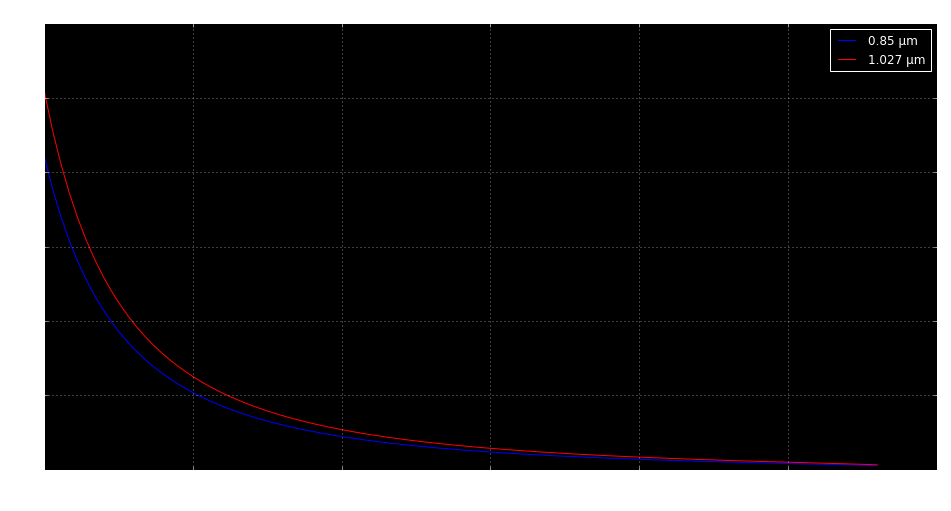

In [182]:
fig = plt.figure()
# change resolution
titlestring =  'Two-photon z-resolution'

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(16, 8)
ax = fig.add_subplot(111)

label1 = str(wavelength1) + ' µm'
ax.plot(NA, resolution_tp_z_FWHM(wavelength1, NA,n),'b', label=label1)

label2 = str(wavelength2) + ' µm'
ax.plot(NA, resolution_tp_z_FWHM(wavelength2, NA,n),'r', label=label2)

legend = ax.legend()
#ax.set_yscale('log')
ax.set_xlabel('Numerical aperture (NA)')
ax.set_ylabel('Resolution (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

(0.4, 1.4)

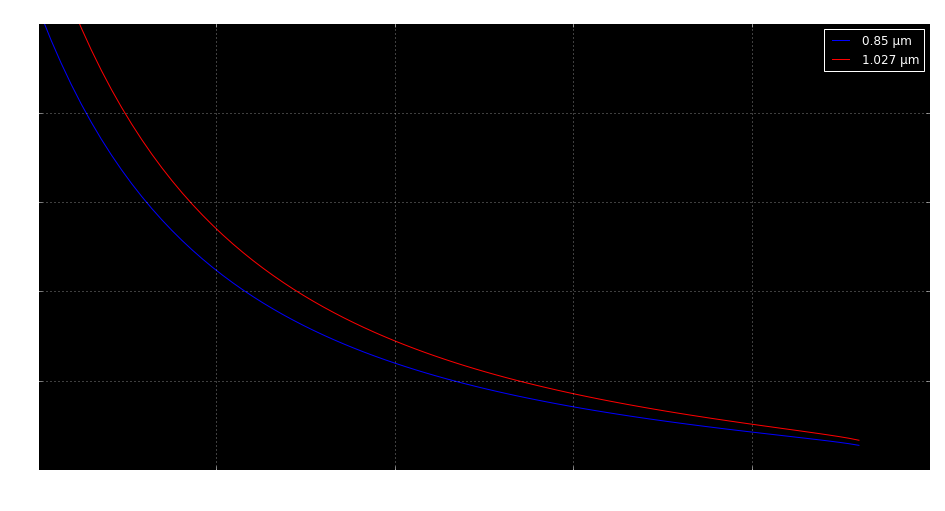

In [184]:
fig = plt.figure()
# change resolution
titlestring =  'Two-photon z-resolution'

plt.title(titlestring,fontsize=15)
plt.grid(True)

fig.set_size_inches(16, 8)
ax = fig.add_subplot(111)

label1 = str(wavelength1) + ' µm'
ax.plot(NA, resolution_tp_z_FWHM(wavelength1, NA,n),'b', label=label1)

label2 = str(wavelength2) + ' µm'
ax.plot(NA, resolution_tp_z_FWHM(wavelength2, NA,n),'r', label=label2)

legend = ax.legend()
#ax.set_yscale('log')
ax.set_xlabel('Numerical aperture (NA)')
ax.set_ylabel('Resolution (µm)')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
ax.set_ylim(0,5)
ax.set_xlim(0.4,1.4)